# Article dataset

In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
article_df = pd.read_csv("data/articles.csv")
customers_df = pd.read_csv("data/customers.csv")
transactions_df = pd.read_csv("data/transactions_train.csv")

In [4]:
article_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [6]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [10]:
# Checking the total number of articles
a = article_df["article_id"].shape[0]
a

105542

In [11]:
# checking the total number of unique articles
uniq_article = article_df["article_id"].nunique()
uniq_article

105542

In [12]:
# checking if all articles are unique
a == uniq_article

True

In [13]:
article_df["article_id"].isna().sum()

0

In [28]:
article_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [83]:
# All columns without any nan values, except the last one
article_df.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [58]:
# detail_desc contains nan values
article_df["detail_desc"].isna().sum()/article_df["detail_desc"].shape[0]*100

0.3941558810710428

In [61]:
# Checking the color values descriptions
article_df["colour_group_name"].describe()

count     105542
unique        50
top        Black
freq       22670
Name: colour_group_name, dtype: object

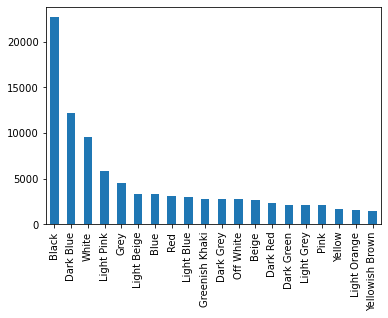

In [62]:
article_df["colour_group_name"].value_counts()[:20].plot.bar()

In [71]:
# check if group name always matches code
article_df[["product_code", "prod_name"]].groupby(["product_code"]).nunique().value_counts()

prod_name
1            45048
2             1842
3              268
4               54
5               12
dtype: int64

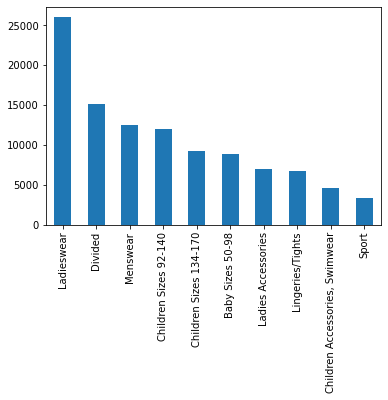

In [80]:
article_df["index_name"].value_counts().plot.bar()

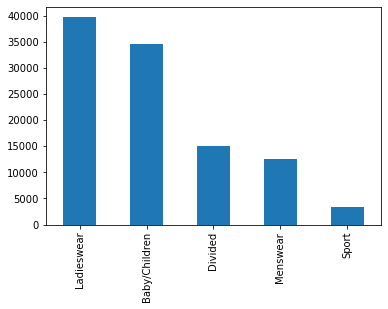

In [79]:
article_df["index_group_name"].value_counts().plot.bar()

# Customer dataset

In [82]:
print(customers_df.shape[0])
#na_users = user_profiles["age"].isna().sum()
#print(f"Total number of users is {user_profiles.shape[0]}. {na_users/user_profiles.shape[0]*100}% have no age.")

1371980


In [5]:
customers_df.count()

customer_id               1371980
FN                         476930
Active                     464404
club_member_status        1365918
fashion_news_frequency    1355971
age                       1356119
postal_code               1371980
dtype: int64

In [85]:
customers_df.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [10]:
customers_df[customers_df["Active"].isna() & customers_df["FN"] == 1]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
137,0005c68366e7955683b7cdc75535f400d76c2e713b6277...,1.0,NaN,ACTIVE,Regularly,43.0,52205389e515cded514c95fb56029ef05f29c189bc706a...
249,000b2018cebd824b6abdcbe9a9178067124ea4516a2d8c...,1.0,NaN,ACTIVE,Regularly,22.0,efe02004f43b4fbe5cc30862bc536832f8430bbfae1c8e...
335,00100a3fbf886724f574b726bdb47cf5b4fba1acbd2cc4...,1.0,NaN,ACTIVE,NONE,22.0,f187902768ee417d3a60f1bbf75ce8f1e7c3fee0faf76b...
438,0014a050e53bac4c5bd56296afbbea26d542fe4340a559...,1.0,NaN,ACTIVE,Regularly,56.0,331678faef3b54c05725daa112632274feb760552d84f8...
478,00163db01b48157e99b49618eee91ef265c193414cfb0a...,1.0,NaN,ACTIVE,Regularly,27.0,0416417bc05524c8407d92efa229f8c94ffb9abd45ffa8...
...,...,...,...,...,...,...,...
1371316,ffe044fa37ae4786bc6c8081c077daae5b203a9f8a2d8f...,1.0,NaN,ACTIVE,Regularly,19.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1371409,ffe425daffac91b6bf77c8a4bb181c4866e3c4a08cbf79...,1.0,NaN,ACTIVE,Regularly,23.0,cc33da67515e2aacf19cfeb38afcc87db10f9fcefb4617...
1371457,ffe653a2cf91f6f353b6333b659c7d8d891a705913fa88...,1.0,NaN,ACTIVE,Regularly,23.0,fe59ceaf169875b877c6fef2e339156183f71d8fd3c404...
1371489,ffe7cc22f132fe52ff777967e5a8769ca13bd5715c3934...,1.0,NaN,ACTIVE,Regularly,55.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [9]:
# Ages should be between 12-100 realistically.
# Note: Describe ignores NaN values
customers_df["age"].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

In [11]:
# Note: It's OK for EDA code to be messy

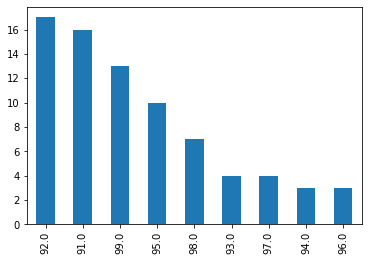

In [13]:
# How many users that are older than 100 are in the dataset?
customers_df[customers_df["age"] > 90]["age"].value_counts().plot.bar()

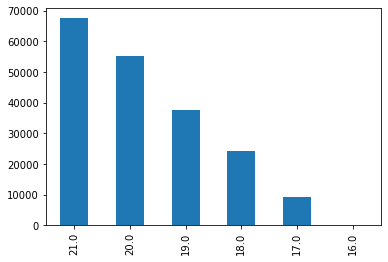

In [15]:
# How many users that are older than 100 are in the dataset?
customers_df[customers_df["age"] < 22]["age"].value_counts().plot.bar()

In [22]:
customers_df["club_member_status"].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [23]:
customers_df["fashion_news_frequency"].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

# Transaction dataset


In [26]:
article_df.duplicated().any()

False

In [25]:
customers_df.duplicated().any()

False

In [24]:
transactions_df.duplicated().any()

True

In [35]:
transactions_df["price"].max()

0.5915254237288136

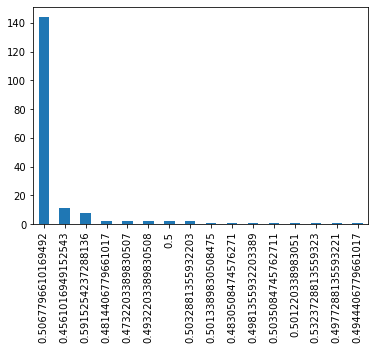

In [40]:
transactions_df[transactions_df["price"] > 0.45]["price"].value_counts().plot.bar()

In [41]:
transactions_df.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [43]:
transactions_df['t_dat'].max()
transactions_df['t_dat'].min()

'2018-09-20'

In [45]:
transactions_df['t_dat'].describe()

count       31788324
unique           734
top       2019-09-28
freq          198622
Name: t_dat, dtype: object